In [18]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/dataviz.png",width=675)

***"One picture is worth a thousand words"*** - Fred R. Barnard

Visual perception offers the highest bandwidth channel, as we acquire much more information through visual perception than with all of the other channels combined, as billions of our neurons are dedicated to this task. Moreover, the processing of visual information is, at its first stages, a highly parallel process. Thus, it is generally easier for humans to comprehend information with plots, diagrams and pictures, rather than with text and numbers. This makes data visualizations a vital part of data science. Some of the key purposes of data visualization are:

1. Data visualization is the first step towards exploratory data analysis (EDA), which reveals trends, patterns, insights, or even irregularities in data.
2. Data visualization can help explain the workings of complex mathematical models.
3. Data visualization are an elegant way to summarise the findings of a data analysis project.
4. Data visualizations (especially interactive ones such as those on Tableau) may be the end-product of data analytics project, where the stakeholders make decisions based on the visualizations.

We'll use a couple of libraries for making data visualizations - [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/). Matplotlib is mostly used for creating relatively simple two-dimensional plots. Its plotting interface is similar to the `plot()` function in MATLAB, so those who have used MATLAB should find it familiar. Seaborn is a recently developed data visualization library based on matplotlib. It is more oriented towards visualizing data with Pandas DataFrame and NumPy arrays. While matplotlib may also be used to create complex plots, seaborn has some built-in themes that may make it more convenient to make complex plots. Seaborn also has color schemes and plot styles that improve the readability and aesthetics of malplotlib plots. However, preferences depend on the user and their coding style, and it is perfectly fine to use either library for making the same visualization.

## Matplotlib

[Matplotlib](https://matplotlib.org/) is:

- a low-level graph plotting library in python that strives to emulate MATLAB, 
- can be used in Python scripts, Python and IPython shells, Jupyter notebooks and web application servers. 
- is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.

**Conceptual model:** Plotting requires action on a range of levels, ranging from the size of the figure to the text object in the plot. Matplotlib provides **object-oriented** interface in the hierarchical fashion to provide complete control over the plot. The user generates and keeps track of the figure and axes objects. These axes objects are then used for most plotting actions.

### Matplotlib: Object hierarchy

A *hierarchy* means that there is a tree-like structure of matplotlib objects underlying each plot.

A *Figure* object is the outermost container for a matplotlib graphic, which can contain multiple *Axes* objects. Note that an *Axes* actually translates into what we think of as an individual plot or graph (rather than the plural of *axis* as we might expect).

The *Figure* object is a box-like container holding one or more Axes (actual plots), as shown in @fig-hierarchy. Below the *Axes* in the hierarchy are smaller objects such as *tick marks, individual lines, legends, and text boxes*. Almost every *element* of a chart is its own manipulable Python object, all the way down to the *ticks* and *labels*.

In [12]:
#| echo: false
#| label: fig-hierarchy
#| fig-cap: Matplotlib Object hierarchy

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/matplotlib.png")

However, Matplotlib presents this as a figure anatomy, rather than an explicit hierarchy. @fig-anatomy shows the components of a figure that can be customized with Matplotlib. *(Source: https://matplotlib.org/stable/gallery/showcase/anatomy.html )*. 

In [20]:
#| echo: false
#| label: fig-anatomy
#| fig-cap: Matplotlib anatomy of a figure

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/anatomy.webp",width=675)

Let's visualize the life expectancy of different countries with GDP per capita. We'll read the data file *gdp_lifeExpectancy.csv*, which contains the GDP per capita and life expectancy of countries from 1952 to 2007.

In [2]:
import pandas as pd
import numpy as np

In [3]:
gdp_data = pd.read_csv('./Datasets/gdp_lifeExpectancy.csv')
gdp_data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Scatterplots and trendline with Matplotlib

**Purpose of scatterplots:** Scatterplots (with or without a trendline) allow us to visualize the relationship between two numerical variables.

We'll import the [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) module of matplotlib to make plots. We'll use the [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function to make the scatter plot, and the functions [xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) for labeling the plot axes.

In [4]:
import matplotlib.pyplot as plt

**Q:** Make a scatterplot of Life expectancy vs GDP per capita.

There are two ways of plotting the figure:

1. Explicitly creating figures and axes, and call methods on them *(object-oriented style)*.

2. Letting pyplot implicitly track the plot that it wants to reference. Simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure *(pyplot-style)*.

We'll plot the figure in both ways.

Text(0.5, 1.0, 'Life expectancy vs GDP per capita from 1952 to 2007')

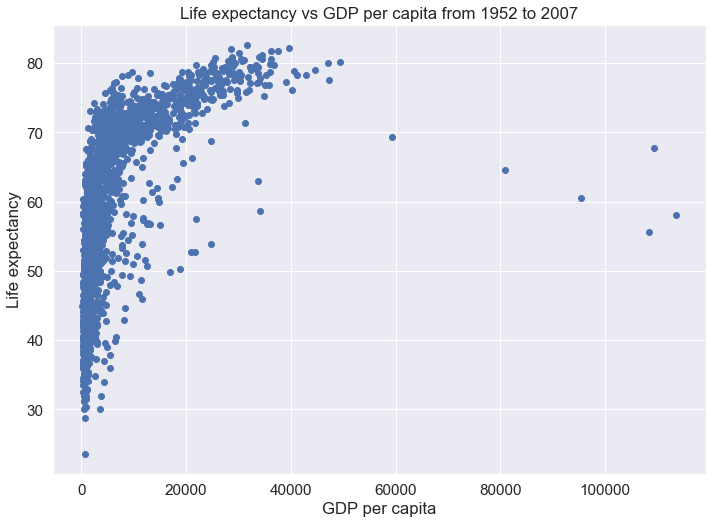

In [288]:
#Method 1: Object-oriented style
fig, ax = plt.subplots() #Create a figure and an axes
x = gdp_data.gdpPercap 
y = gdp_data.lifeExp
ax.plot(x,y,'o')   #Plot data on the axes
ax.set_xlabel('GDP per capita')    #Add an x-label to the axes
ax.set_ylabel('Life expectancy')   #Add a y-label to the axes
ax.set_title('Life expectancy vs GDP per capita from 1952 to 2007')

Text(0.5, 1.0, 'Life expectancy vs GDP per capita from 1952 to 2007')

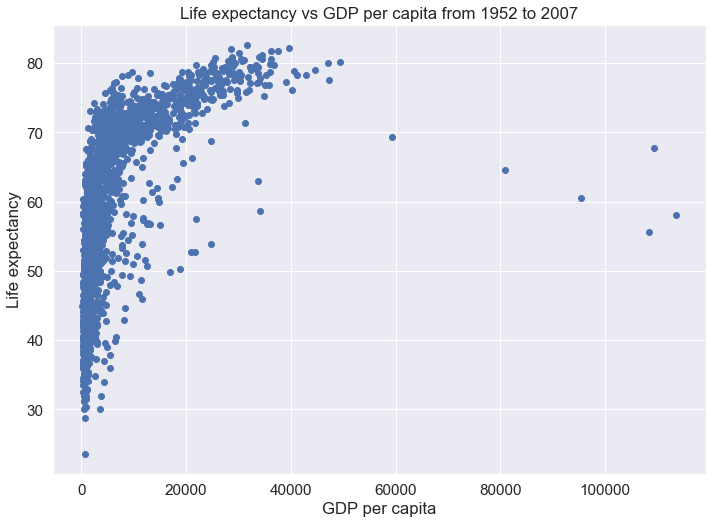

In [289]:
#Method 2: pyplot style
x = gdp_data.gdpPercap
y = gdp_data.lifeExp
plt.plot(x,y,'o') #By default, the plot() function makes a lineplot. The 'o' arguments specifies a scatterplot
plt.xlabel('GDP per capita')  #Labelling the horizontal X-axis
plt.ylabel('Life expectancy') #Labelling the verical Y-axis
plt.title('Life expectancy vs GDP per capita from 1952 to 2007')

Both the plotting styles - object-oriented style and the pyplot style are perfectly valid and have their pros and cons. 

- Pyplot style is easier for simple plots

- Object-oriented style is slightly more complicated but more powerful as it allows for greater control over the axes in figure. This proves to be quite useful when we are dealing with a figure with multiple axes.

From the above plot, we observe that life expectancy seems to be positively correlated with the GDP per capita of the country, as one may expect. However, there are a few outliers in the data - which are countries having extremely high GDP per capita, but not a correspondingly high life expectancy.

Sometimes it is difficult to get an idea of the overall trend (positive or negative correlation). In such cases, it may help to add a trendline to the scatter plot. In the plot below we add a trendline over the scatterplot showing that the life expectancy on an average increases with increasing GDP per capita. The trendline is actually a linear regression of life expectancy on GDP per capita. However, we'll not discuss linear regression in this book.

**Q:** Add a trendline over the scatterplot of life expectancy vs GDP per capita.

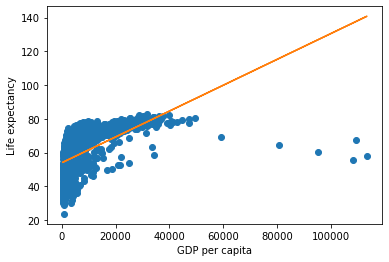

In [4]:
#Making a scatterplot of Life expectancy vs GDP per capita
x = gdp_data.gdpPercap
y = gdp_data.lifeExp
plt.plot(x,y,'o') #By default, the plot() function makes a lineplot. The 'o' arguments specifies a scatterplot
plt.xlabel('GDP per capita')  #Labelling the horizontal X-axis
plt.ylabel('Life expectancy') #Labelling the verical Y-axis

#Plotting a trendline (linear regression) on the scatterplot
slope_intercept_trendline = np.polyfit(x,y,1)   #Finding the slope and intercept for the trendline
compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
plt.plot(x,compute_y_given_x(x)) #Plotting the trendline

The above plot shows that our earlier intuition of a postive correlation between Life expectancy and GDP per capita was correct.

We used the NumPy function [polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to compute the slope and intercept of the trendline. Then, we defined an object `compute_y_given_x` of [poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) class and used it to compute the trendline.

### Subplots

There is often a need to make a few plots together to compare them. See the example below.

**Q:** Make scatterplots of life expectancy vs GDP per capita separately for each of the 4 continents of Asia, Europe, Africa and America. Arrange the plots in a 2 x 2 grid.

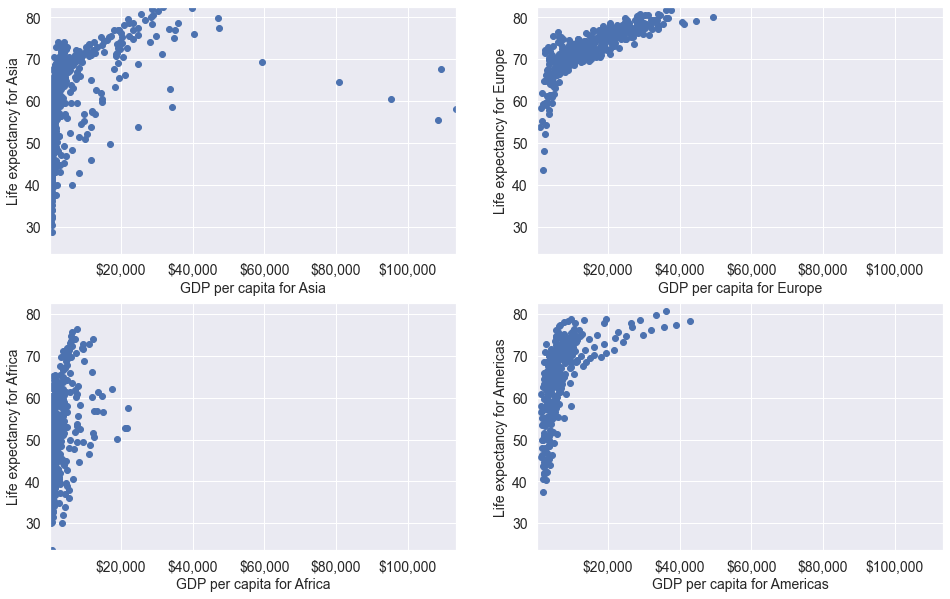

In [275]:
#Defining a 2x2 grid of subplots
fig, axes = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(wspace=0.2) #adjusting white space between individual plots

#Making a scatterplot of Life expectancy vs GDP per capita for each continent
continents = np.array([['Asia', 'Europe'], ['Africa', 'Americas']])

#Looping over the 2x2 grid
for i in range(2):
    for j in range(2):
        
        #Getting the GDP per capita and life expectancy of the countries of the (i,j)th continent
        x = gdp_data.loc[gdp_data.continent==continents[i,j],:].gdpPercap
        y = gdp_data.loc[gdp_data.continent==continents[i,j],:].lifeExp
        
        #Making the scatterplot
        axes[i,j].plot(x,y,'o') 
        
        #Setting limits on the 'x' and 'y' axes
        axes[i,j].set_xlim([gdp_data.gdpPercap.min(), gdp_data.gdpPercap.max()])
        axes[i,j].set_ylim([gdp_data.lifeExp.min(), gdp_data.lifeExp.max()])
        
        #Labelling the 'x' and 'y' axes
        axes[i,j].set_xlabel('GDP per capita for '+ continents[i,j],fontsize = 14)
        axes[i,j].set_ylabel('Life expectancy for '+ continents[i,j],fontsize = 14)
        
        #Putting a dollar sign, and thousand-comma separator on x-axis labels
        axes[i,j].xaxis.set_major_formatter('${x:,.0f}')
        
        #Increasing font size of axis labels
        axes[i,j].tick_params(axis = 'both',labelsize=14)

We observe that for each continent, except Africa, initially life expectancy increases rapidly with increasing GDP per capita. However, after a certain threshold of GDP per capita, life expectancy increases slowly. Several countries in Europe enjoy a relatively high GDP per capita as well as high life expectancy. Some countries in Asia have an extremely high GDP per capita, but a relatively low life expectancy. It will be interesting to see the proportion of GDP associated with healthcare for these outlying Asian countries, and European countries.

We used the [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) function of matplotlib to define the 2x2 grid of subplots. The function [subplots_adjust()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) can be used to adjust white spaces around the plot. We used a `for` loop to iterate over each subplot. The `axes` object returned by the `subplot()` function was used to refer to individual subplots.

### Practice problem 1

Is `NU_GPA` associated with `parties_per_month`? Analyze the association separately for *Sophomores, Juniors, and Seniors* (categories of the variable `school_year`).

Make scatterplots of `NU_GPA` vs `parties_per_month` in a 1 x 3 grid, where each grid is for a distinct `school_year`. Plot the trendline as well for each scatterplot. Use the file *survey_data_clean.csv*.

**Solution:**

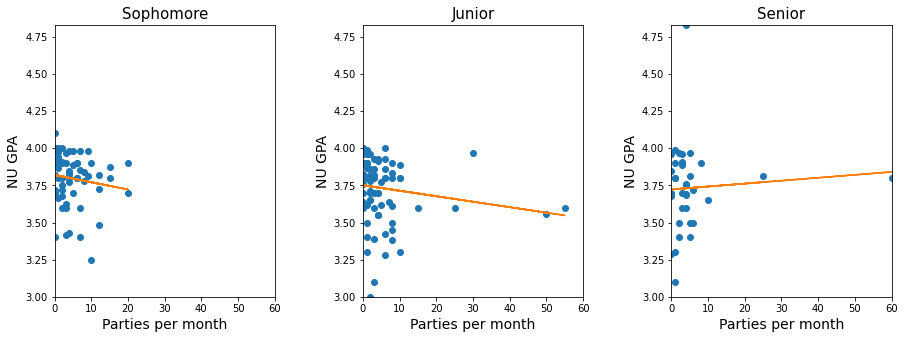

In [18]:
survey_data = pd.read_csv('./Datasets/survey_data_clean.csv')

def NU_GPA_vs_parties_per_month(data):
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    plt.subplots_adjust(wspace=0.4) 
    
    school_years = np.array(['Sophomore', 'Junior','Senior'])
    for i in range(3):
        x = data.loc[data.school_year==school_years[i],:].parties_per_month
        y = data.loc[data.school_year==school_years[i],:].NU_GPA
        
        #The data has missing values. We can draw a trendline using only the non-missing value-pairs of NU_GPA and parties_per_month
        #`idx_non_missing` will have the indices of the non-missing value-pairs of NU_GPA and parties_per_month
        idx_non_missing = np.isfinite(x) & np.isfinite(y)
        
        axes[i].plot(x,y,'o',label = school_years[i]) 
        axes[i].set_xlim([data.parties_per_month.min(), data.parties_per_month.max()])
        axes[i].set_ylim([data.NU_GPA.min(), data.NU_GPA.max()])
        axes[i].set_xlabel('Parties per month',fontsize = 14)  
        axes[i].set_ylabel('NU GPA',fontsize = 14) 
        axes[i].set_title(school_years[i],fontsize = 15)
        slope_intercept_trendline = np.polyfit(x[idx_non_missing],y[idx_non_missing],1)   #Finding the slope and intercept for the trendline
        compute_y_given_x = np.poly1d(slope_intercept_trendline) #Defining a function that computes the 'y' given 'x' for the trendline
        axes[i].plot(x,compute_y_given_x(x)) #Plotting the trendline

NU_GPA_vs_parties_per_month(survey_data)

Note that the trendline in the above plots seems to be influenced by a few points having extreme values of `parties_per_month`. These points have a *high leverage* (a concept we'll learn in a future course on linear regression) in influencing the trendline. So, we should visualize the trend by removing or capping these *high-leverage* points, to avoid the distortion of the trend by a few points.

Let us cap the the values of `parties_per_month` to 30, and make the visualizations again.

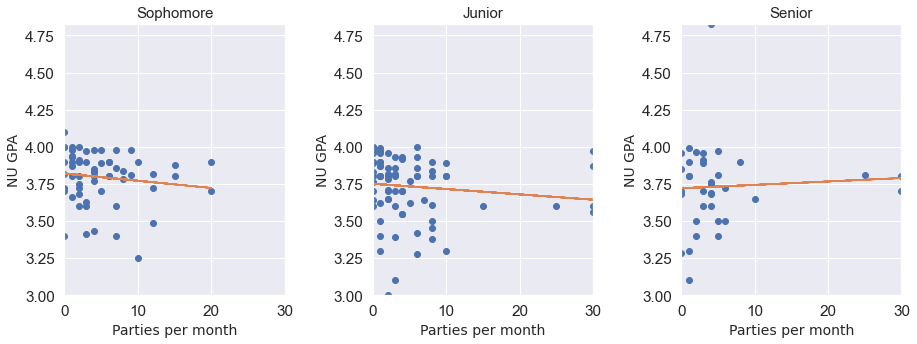

In [273]:
survey_data_parties_capped = survey_data.copy()
survey_data_parties_capped.parties_per_month = survey_data.parties_per_month.apply(lambda x: min(30,x))
NU_GPA_vs_parties_per_month(survey_data_parties_capped)

We see that the trend didn't change much after removing the *high leverage* points. *(Note that although the high leverage points have the leverage to influence the trendline, they need not necessarily influence it)*. From the visualization, `NU_GPA` doesn't seem to be associated with `parties_per_month` for students of any of the school years. 

### Overlapping plots with legend

We can also have the scatterplot of all the continents on the sample plot, with a distinct color for each continent. A legend will be required to identify the continent's color.

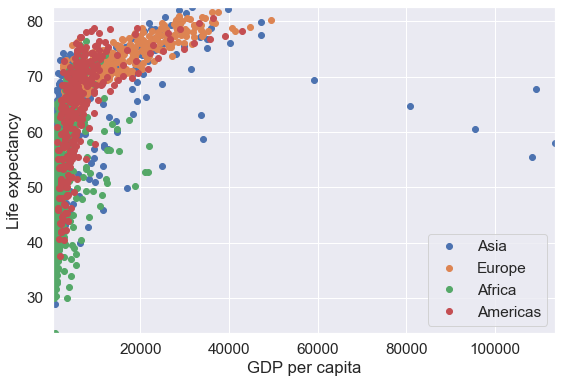

In [291]:
continents = np.array([['Asia', 'Europe'], ['Africa', 'Americas']])
plt.rcParams["figure.figsize"] = (9,6)
for i in range(2):
    for j in range(2):
        x = gdp_data.loc[gdp_data.continent==continents[i,j],:].gdpPercap
        y = gdp_data.loc[gdp_data.continent==continents[i,j],:].lifeExp
        plt.plot(x,y,'o',label = continents[i,j]) 
        plt.xlim([gdp_data.gdpPercap.min(), gdp_data.gdpPercap.max()])
        plt.ylim([gdp_data.lifeExp.min(), gdp_data.lifeExp.max()])
        plt.xlabel('GDP per capita')  
        plt.ylabel('Life expectancy') 
plt.legend()

Note that a disadvantage of the above plot is overplotting. The data points corresponding to the *Americas* are hiding the data points of other continents. However, if the data points corresponding to different categories are spread apart, then it may be convenient to visualize all the categories on the same plot.

## Pandas

Matplotlib is a low-level tool, in which different components of the plot, such as points, legend, axis titles, etc. need to be specified separately. The Pandas [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function can be used directly with a DataFrame or Series to make plots.

### Scatterplots with Pandas

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


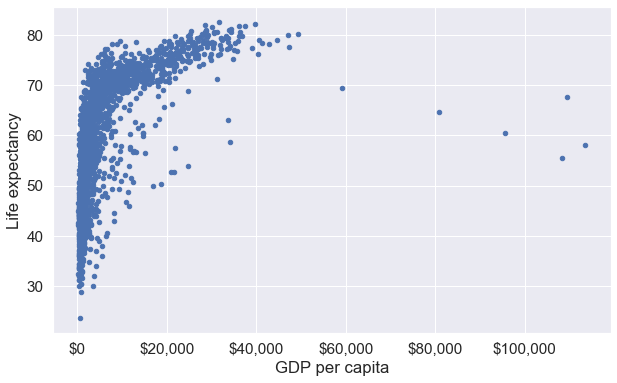

In [304]:
#Plotting life expectancy vs GDP per capita using the Pandas plot() function
ax = gdp_data.plot(x = 'gdpPercap', y = 'lifeExp', kind = 'scatter',figsize=(10, 6),xlabel = 'GDP per capita', 
              ylabel = 'Life expectancy')
ax.xaxis.set_major_formatter('${x:,.0f}')

In the above plot, note that:

- With matplotlib, it will take 3 lines to make the same plot - one for the scatterplot, and two for the axis titles.
- The object `ax` is of type *matplotlib.axes._subplots.AxesSubplot (check the code below)*. This means we can use the attributes and methods associated with the `axes` object of Matplotlib. If you see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) of the Pandas `plot()` function, you will find that under the `kwargs**` argument, you have *Options to pass to matplotlib plotting method.* Thus, you get the convenience of using the Pandas `plot()` function, while also having the attributes and methods associated with Matplotlib.

In [75]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

### Lineplots with Pandas

**Purpose of lineplots:** Lineplots show the relationship between two numerical variables when the variable on the x-axis, also called the *explanatory variable*, is of a sequential nature; in other words there is an inherent ordering to the variable. The most common example of lineplots have some notion of time on the x-axis (or the horizontal axis): hours, days, weeks, years, etc. Since time is sequential, we connect consecutive observations of the variable on the y-axis with a line. Lineplots that have some notion of time on the x-axis are also called time series plots. Lineplots should be avoided when there is not a clear sequential ordering to the variable on the x-axis.

Let us re-arrange the data to show other benefits of the Pandas `plot()` function. Note that data resphaping is explained in Chapter 8 of the book, so you may ignore the code block below that uses the [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [86]:
#You may ignore this code block until Chapter 8.
mean_gdp_per_capita = gdp_data.pivot_table(index = 'year', columns = 'continent',values = 'gdpPercap')
mean_gdp_per_capita.head()

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,1252.572466,4079.062552,5195.484004,5661.057435,10298.085650
1957,1385.236062,4616.043733,5787.732940,6963.012816,11598.522455
1962,1598.078825,4901.541870,5729.369625,8365.486814,12696.452430
1967,2050.363801,5668.253496,5971.173374,10143.823757,14495.021790
1972,2339.615674,6491.334139,8187.468699,12479.575246,16417.333380


We have reshaped the data to obtain the mean GDP per capita of each continent for each year.

The pandas `plot()` function can be directly used with this DataFrame to create line plots showing mean GDP per capita of each continent with year.

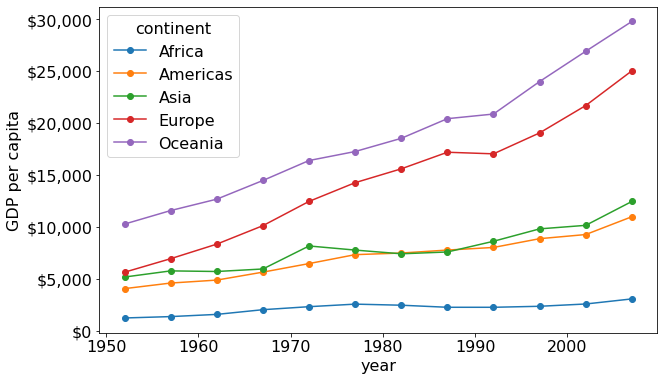

In [88]:
ax = mean_gdp_per_capita.plot(ylabel = 'GDP per capita',figsize = (10,6),marker='o')
ax.yaxis.set_major_formatter('${x:,.0f}')

We observe that the mean GDP per capita of of Europe and Oceania have increased rapidly, while that for Africa is increasing very slowly.

The above plot will take several lines of code if developed using only matplotlib. The pandas `plot()` function has a framework to conveniently make commonly used plots. 

Note that argument *marker = 'o'* puts a solid circle at each of the data points.

### Bar plots with Pandas

**Purpose of bar plots:** Barplots are used to visualize any aggregate statistics of a continuous variable with respect to the categories or levels of a categorical variable. For example, we may visualize the average IMDB rating *(aggregate statistics)* of movies based on their genre *(the categorical variable)*.

Bar plots can be made using the pandas [bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) function  with the DataFrame or Series, just like the line plots and scatterplots.

Below, we are reading the dataset of noise complaints of type *Loud music/Party* received the police in New York City in 2016.

In [8]:
nyc_party_complaints = pd.read_csv('./Datasets/party_nyc.csv')
nyc_party_complaints.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Hour_of_the_day,Month_of_the_year
0,12/31/2015 0:01,12/31/2015 3:48,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,0,12
1,12/31/2015 0:02,12/31/2015 4:36,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,0,12
2,12/31/2015 0:03,12/31/2015 0:40,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,0,12
3,12/31/2015 0:03,12/31/2015 1:53,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,0,12
4,12/31/2015 0:05,12/31/2015 3:49,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,0,12


Let us visualise the locations from where the the complaints are coming.

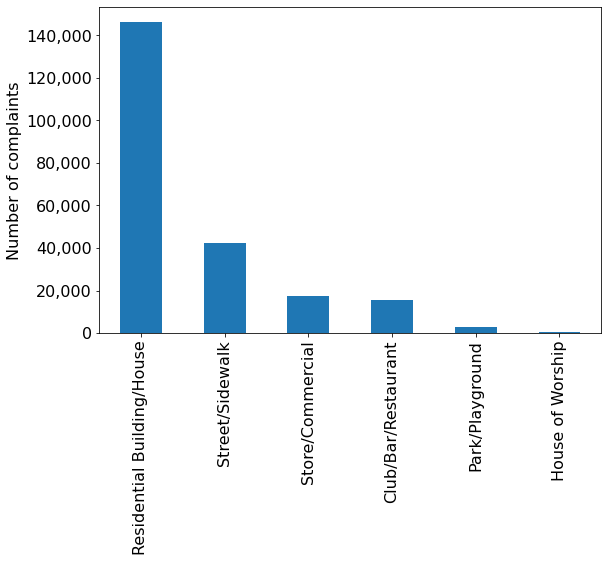

In [99]:
#Using the pandas function bar() to create bar plot
ax = nyc_party_complaints['Location Type'].value_counts().plot.bar(ylabel = 'Number of complaints')
ax.yaxis.set_major_formatter('{x:,.0f}')

From the above plot, we observe that most of the complaints come from residential buildings and houses, as one may expect. 

Let is visualize the time of the year when most complaints occur.

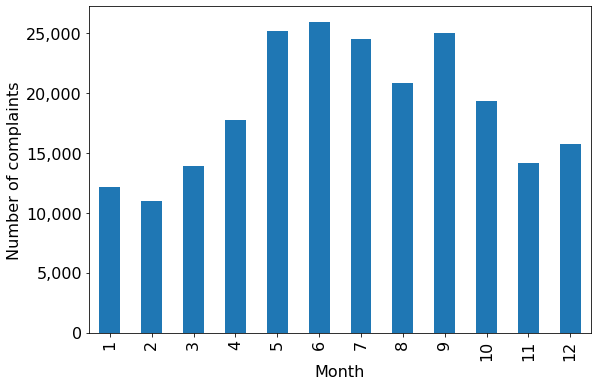

In [101]:
#Using the pandas function bar() to create bar plot
ax = nyc_party_complaints['Month_of_the_year'].value_counts().sort_index().plot.bar(ylabel = 'Number of complaints',
                                                                              xlabel = "Month")
ax.yaxis.set_major_formatter('{x:,.0f}')

Try executing the code without [sort_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html) to figure out the purpose of using the function.

From the above plot, we observe that most of the complaints occur during summer and early Fall.

Let us create a stacked bar chart that combines both the above plots into a single plot. You may ignore the code used for re-shaping the data until Chapter 8. The purpose here is to show the utility of the pandas `bar()` function.

In [104]:
#Reshaping the data to make it suitable for a stacked barplot - ignore this code until chapter 8
complaints_location=pd.crosstab(nyc_party_complaints.Month_of_the_year, nyc_party_complaints['Location Type'])
complaints_location.head()

Location Type,Club/Bar/Restaurant,House of Worship,Park/Playground,Residential Building/House,Store/Commercial,Street/Sidewalk
Month_of_the_year,,,,,,
1,748,24,17,9393,1157,832
2,570,29,16,8383,1197,782
3,747,39,90,9689,1480,1835
4,848,53,129,11984,1761,2943
5,2091,72,322,15676,1941,5090


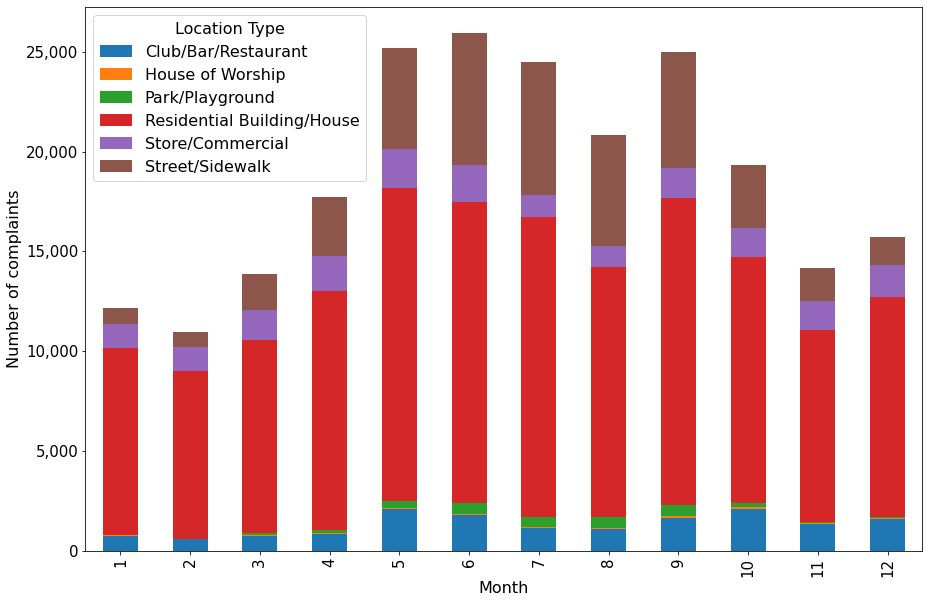

In [107]:
#| label: fig-stacked
#| fig-cap: Stacked bar plot with Pandas

#Stacked bar plot showing number of complaints at different months of the year, and from different locations
ax = complaints_location.plot.bar(stacked=True,ylabel = 'Number of complaints',figsize=(15, 10), xlabel = 'Month')
ax.tick_params(axis = 'both',labelsize=15)
ax.yaxis.set_major_formatter('{x:,.0f}')

The above plots gives the insights about location and day of the year simultaneously that were previously separately obtained by the individual plots.

An alternative to stacked barplots are *side-by-side* barplots, as shown below.

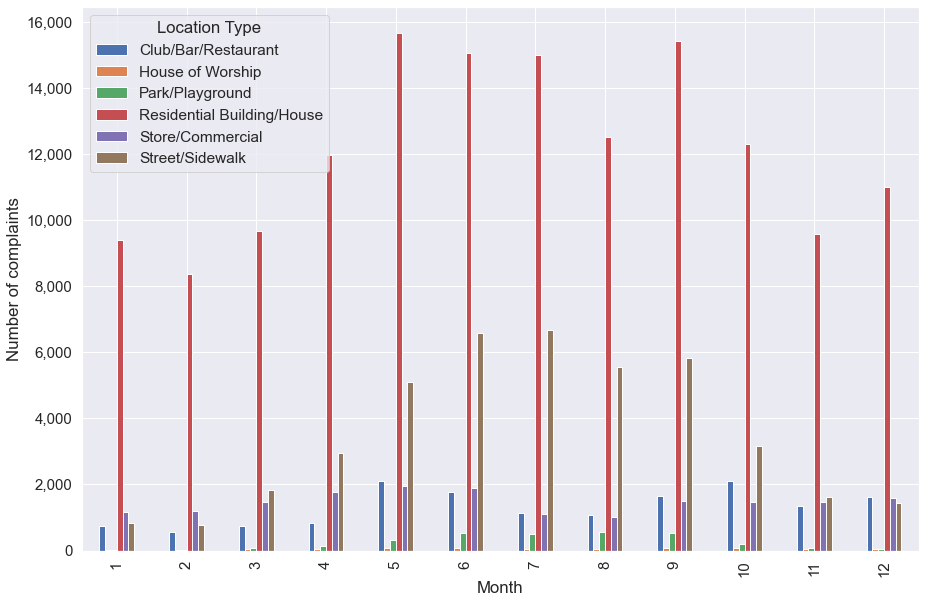

In [253]:
#Side-by-side bar plot showing number of complaints at different months of the year, and from different locations
ax = complaints_location.plot.bar(ylabel = 'Number of complaints',figsize=(15, 10), xlabel = 'Month')
ax.tick_params(axis = 'both',labelsize=15)
ax.yaxis.set_major_formatter('{x:,.0f}')

$\color{red}{\text{Q1}}$ In which scenarios should we use a stacked barplot instead of a side-by-side barplot and vice-versa?

## Seaborn

Seaborn offers the flexibility of simultaneously visualizing multiple variables in a single plot, and offers several themes to develop plots.

In [5]:
#Importing the seaborn library
import seaborn as sns

### Bar plots with confidence intervals with Seaborn

We'll group the data to obtain the total complaints for each *Location Type, Borough, Month_of_the_year, and Hour_of_the_day*. Note that you'll learn grouping data in Chapter 9, so you may ignore the next code block. The grouping is done to shape the data in a suitable form for visualization.

In [10]:
#Grouping the data to make it suitable for visualization using Seaborn. Ignore this code block until learn chapter 9.
nyc_complaints_grouped = nyc_party_complaints[['Location Type','Borough','Month_of_the_year','Latitude','Hour_of_the_day']].groupby(['Location Type','Borough','Month_of_the_year','Hour_of_the_day'])['Latitude'].agg([('complaints','count')]).reset_index()
nyc_complaints_grouped.head()

,Location Type,Borough,Month_of_the_year,Hour_of_the_day,complaints
0,Club/Bar/Restaurant,BRONX,1,0,10
1,Club/Bar/Restaurant,BRONX,1,1,10
2,Club/Bar/Restaurant,BRONX,1,2,6
3,Club/Bar/Restaurant,BRONX,1,3,6
4,Club/Bar/Restaurant,BRONX,1,4,3


Let us create a bar plot visualizing the average number of complaints with the time of the day.

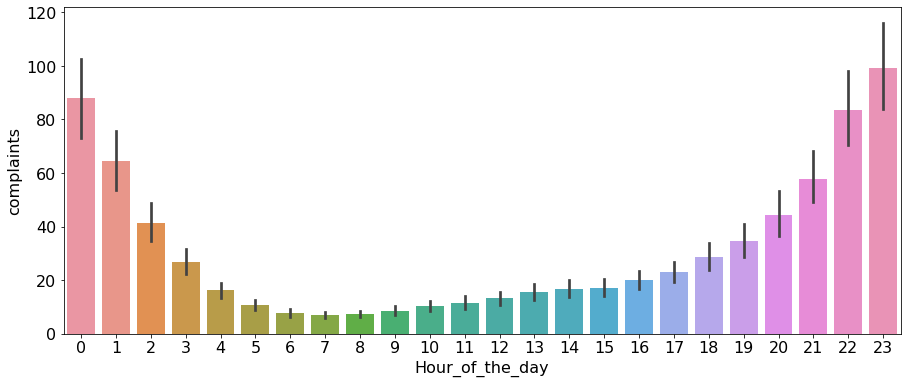

In [127]:
ax = sns.barplot(x="Hour_of_the_day", y = 'complaints',  data=nyc_complaints_grouped)
ax.figure.set_figwidth(15)

From the above plot, we observe that most of the complaints are made around midnight. However, interestingly, there are some complaints at each hour of the day. 

Note that the above barplot shows the mean number of complaints in a month at each hour of the day. The black lines are the 95% confidence intervals of the mean number of complaints.

### Facetgrid: Multi-plot grid for plotting conditional relationships

With pandas, we simultaneously visualized the number of complaints with month of the year and location type in @fig-stacked. We'll use Seaborn to add another variable - Borough to the visualization.

**Q:** Visualize the mean number of complaints with *Month_of_the_year, Location Type,* and *Borough*. 

The seaborn class [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) is used to design the plot, i.e., specify the way the data will be divided in mutually exclusive subsets for visualization. Then the [map] function of the `FacetGrid` class is used to apply a plotting function to each subset of the data.

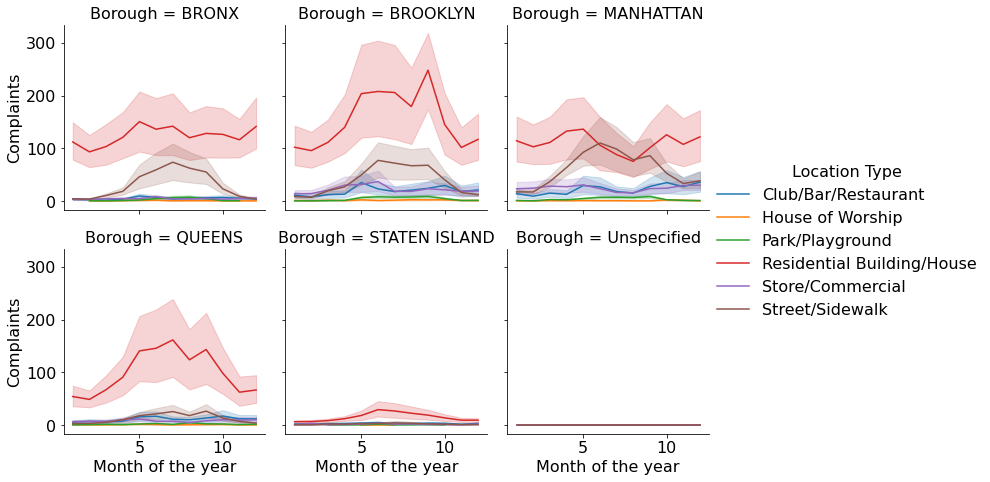

In [146]:
#Visualizing the number of complaints with Month_of_the_year, Location Type, and Borough.
a = sns.FacetGrid(nyc_complaints_grouped, hue = 'Location Type', col = 'Borough',col_wrap=3,height=3.5,aspect = 1)
a.map(sns.lineplot,'Month_of_the_year','complaints')
a.set_axis_labels("Month of the year", "Complaints")
a.add_legend()

From the above plot, we get a couple of interesting insights:
1. For Queens and Staten Island, most of the complaints occur in summer, for Manhattan and Bronx it is mostly during late spring, while Brooklyn has a spike of complaints in early Fall.
2. In most of the Boroughs, the majority complaints always occur in residential areas. However, for Manhattan, the number of street/sidewalk complaints in the summer are comparable to those from residential areas.

We have visualized 4 variables simultaneously in the above plot.

Let us consider another example, where we will visualize the weather in a few cities of Australia. The file *Australia_weather.csv* consists of weather details of Sydney, Canberra, and Melbourne from 2007 to 2017.

In [148]:
aussie_weather = pd.read_csv('./Datasets/Australia_weather.csv')
aussie_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,10/20/2010,Sydney,12.9,20.3,0.2,3.0,10.9,ENE,37,W,...,57,1028.8,1025.6,3,1,16.9,19.8,No,0.0,No
1,10/21/2010,Sydney,13.3,21.5,0.0,6.6,11.0,ENE,41,W,...,58,1025.9,1022.4,2,5,17.6,21.3,No,0.0,No
2,10/22/2010,Sydney,15.3,23.0,0.0,5.6,11.0,NNE,41,W,...,63,1021.4,1017.8,1,4,19.0,22.2,No,0.0,No
3,10/26/2010,Sydney,12.9,26.7,0.2,3.8,12.1,NE,33,W,...,56,1018.0,1015.0,1,5,17.8,22.5,No,0.0,No
4,10/27/2010,Sydney,14.8,23.8,0.0,6.8,9.6,SSE,54,SSE,...,69,1016.0,1014.7,2,7,20.2,20.6,No,1.8,Yes


In [149]:
aussie_weather.shape

(4666, 24)

**Q:** Visualize if it rains the next day (*RainTomorrow*) given whether it has rained today (*RainToday*), the current day's humidity (*Humidity9am*), maximum temperature (*MaxTemp*) and the city (*Location*). 

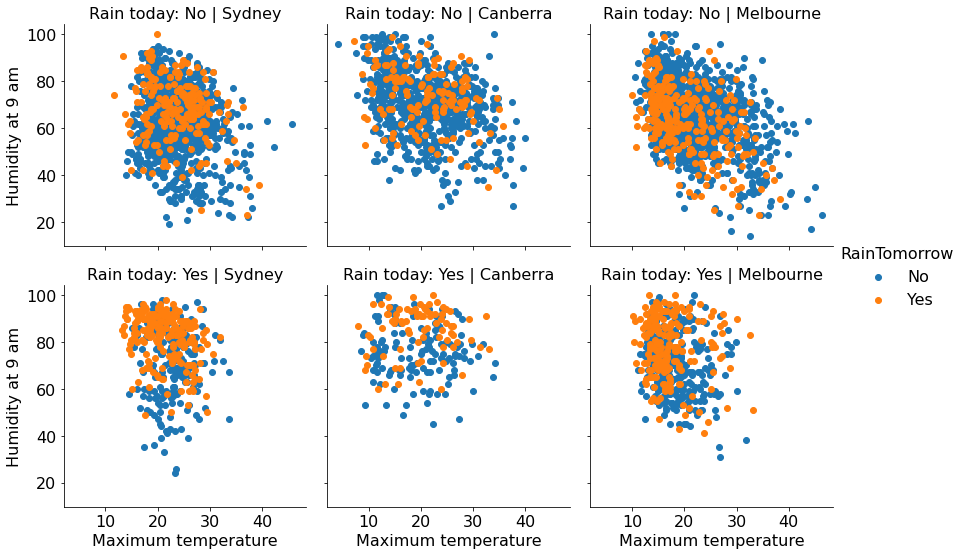

In [156]:
a = sns.FacetGrid(aussie_weather,col='Location',row='RainToday',height = 4,aspect = 1,hue = 'RainTomorrow')
a.map(plt.scatter,'MaxTemp','Humidity9am')
a.set_axis_labels("Maximum temperature", "Humidity at 9 am")
a.set_titles(col_template="{col_name}", row_template="Rain today: {row_name}")
a.add_legend()

Humidity tends to be higher when it is going to rain the next day. However, the correlation is much more pronounced for Syndey. In case it is not raining on the current day, humidity seems to be slightly negatively correlated with temperature.

### Practice exercise 2

How does the expected marriage age of the people of STAT303-1 depend on their characteristics? We'll use visualizations to  answer this question. Use data from the file *survey_data_clean.csv.* Proceed as follows:

1. Make a visualization that compares the mean `expected_marriage_age` of introverts and extroverts *(use the variable `introvert_extrovert`)*. What insights do you obtain?

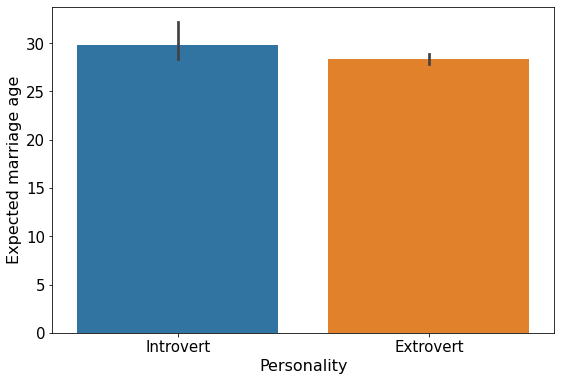

In [31]:
plt.rcParams["figure.figsize"] = (9,6)
sns.barplot(x = 'introvert_extrovert' ,y = 'expected_marriage_age', data = survey_data)
plt.xlabel('Personality', fontsize=16);
plt.ylabel('Expected marriage age', fontsize=16);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

The mean expected marriage age for introverts is about 2 years higher than that for extroverts. Also, there is a higher variation in the expected marriage age of introverts as compared to extroverts.

2. Does the mean `expected_marriage_age` of introverts and extroverts depend on whether they believe in love in first sight *(variable name: `love_first_sight`)*? Update the previous visualization to answer the question.

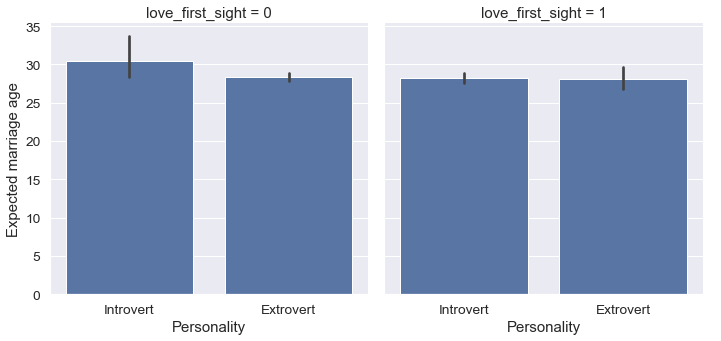

In [34]:
sns.set(font_scale=1.25)
a = sns.FacetGrid(survey_data,col='love_first_sight',height = 5,aspect = 1)
a.map(sns.barplot, 'introvert_extrovert' , 'expected_marriage_age' ,order = ['Introvert', 'Extrovert'])
a.set_axis_labels("Personality", "Expected marriage age")
a.add_legend()

Yes, only those introverts who do not believe in love in first sight have a higher mean value of expected marriage age.

3. In addition to `love_first_sight`, does the mean `expected_marriage_age` of introverts and extroverts depend on whether they are a procrastinator *(variable name: `procrastinator`)*? Update the previous visualization to answer the question.

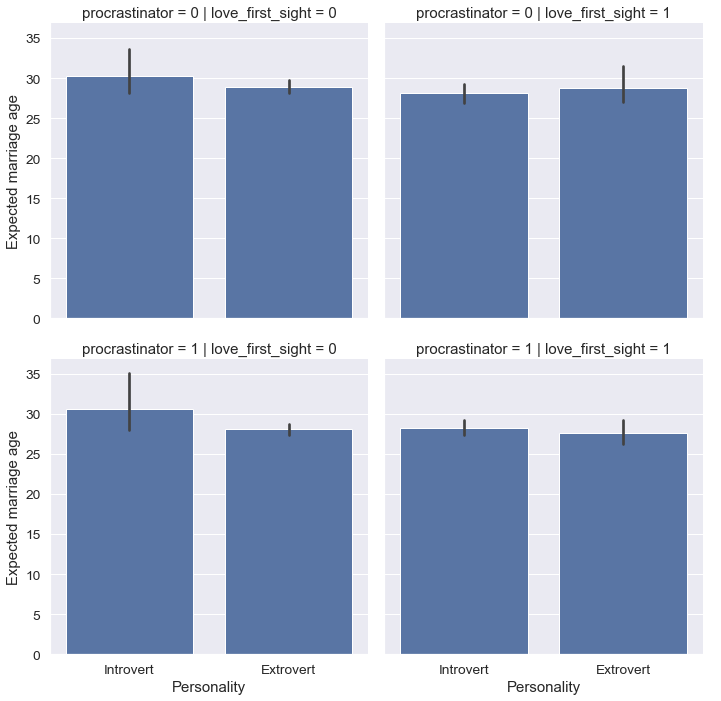

In [35]:
sns.set(font_scale=1.25)
a = sns.FacetGrid(survey_data,col='love_first_sight',height = 5,aspect = 1, row = 'procrastinator')
a.map(sns.barplot, 'introvert_extrovert' , 'expected_marriage_age' ,order = ['Introvert', 'Extrovert'])
a.set_axis_labels("Personality", "Expected marriage age")
a.add_legend()

Procrastination does not seem to make much of a difference in the expected marriage age. The mean expected marriage age of procrastinating introverts seems to be only a little higher than the non-procrastinating introverts. 

4. Is there any critical information missing in the above visualizations that, if revealed, may cast doubts on the patterns observed in them?

Yes, we don't know the number of observations corresponding to each bar of the bar plots. If there are a very few observations in any of the categories, then the trend shown by that category may not be reliable. For example, in the data (`survey_data`), there are only 8 introverts who are not procrastinators and believe in love in first sight, while there are 52 introverts who are procrastinators and do not believe in love in first sight. 

If there are more introverts in the class of STAT303-1 who are not procrastinators and believe in love at first sight (may be they didn't fill the survey), then they are under-represented in the sample of people who filled the survey, and the trend observed for them may be less reliable than that for other people.

In [42]:
#Code for finding the number of people in each category - you will understand this code later in chapter 9 on data aggregation
survey_data[['introvert_extrovert','love_first_sight','procrastinator','Timestamp']].groupby(['introvert_extrovert',
                                                                                  'love_first_sight','procrastinator']).count()

Timestamp
introvert_extrovert love_first_sight procrastinator           
Extrovert           0                0                      19
                                     1                      35
                    1                0                      10
                                     1                      15
Introvert           0                0                      32
                                     1                      52
                    1                0                       8
                                     1                      21

### Histogram and density plots with Seaborn

**Purpose:** Histogram and density plots visualize the distribution of a continuous variable.

A histogram plots the number of observations occurring within discrete, evenly spaced bins of a random variable, to visualize the distribution of the variable. It may be considered a special case of a bar plot as bars are used to plot the observation counts.

A density plot uses a kernel density estimate to approximate the distribution of random variable.

We can use the Seaborn [displot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to make both kinds of plots - histogram or density plot.

**Example:** Make a histogram showing the distributions of maximum temperature in Sydney, Canberra and Melbourne. 

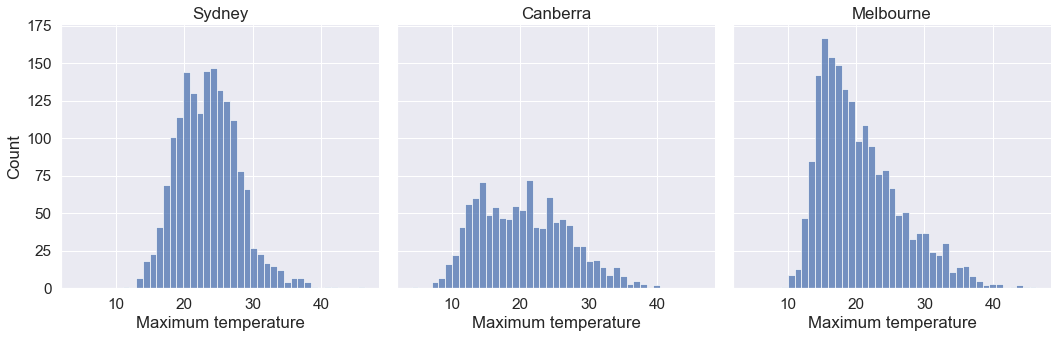

In [188]:
sns.set(font_scale = 1.4)
a = sns.displot(data = aussie_weather, x = 'MaxTemp',kind = 'hist',col='Location')
a.set_axis_labels("Maximum temperature", "Count")
a.set_titles("{col_name}")

From the above plot, we observe that:
1. Melbourne has a right skewed distribution with the median temperature being smaller than the mean.
2. Canberra seems to have the highest variation in the temperature.

**Example:** Make a density plot showing the distributions of maximum temperature in Sydney, Canberra and Melbourne. 

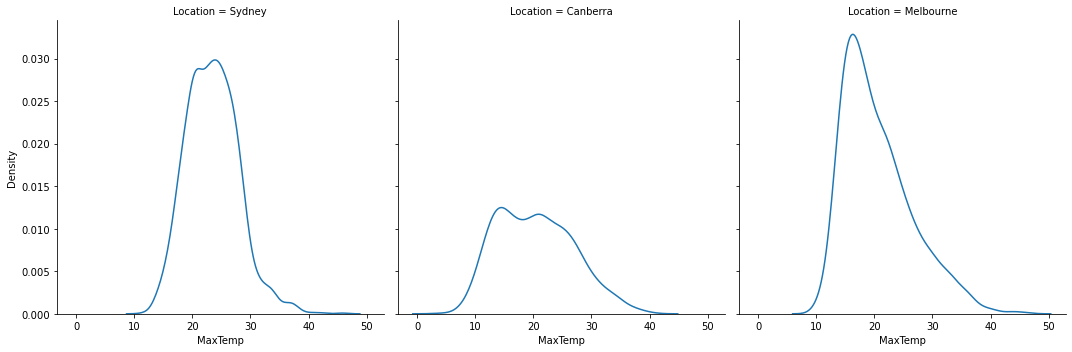

In [262]:
sns.displot(data = aussie_weather, x = 'MaxTemp',kind = 'kde', col = 'Location')

**Example:** Show the distributions of the maximum and minimum temperatures in a single plot. 

Text(0.5, 0, 'Temperature')

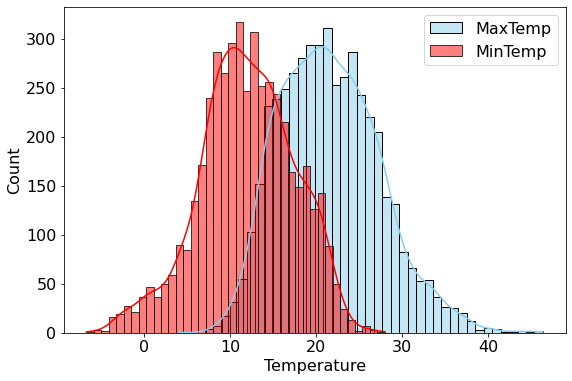

In [158]:
sns.histplot(data=aussie_weather, x="MaxTemp", color="skyblue", label="MaxTemp", kde=True)
sns.histplot(data=aussie_weather, x="MinTemp", color="red", label="MinTemp", kde=True)
plt.legend()
plt.xlabel('Temperature')

The Seaborn function [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) can be used to make a density plot overlapping on a histogram.

### Boxplots with Seaborn

**Purpose:** Boxplots is a standardized way of visualizing the distribution of a continuous variable. They show five key metrics that describe the data distribution - median, 25th percentile value, 75th percentile value, minimum and maximum, as shown in the figure below. Note that the minimum and maximum exclude the outliers. 

In [267]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/boxplot.jpg", width = 600)

**Example:** Make a boxplot comparing the distributions of maximum temperatures of Sydney, Canberra and Melbourne, given whether or not it has rained on the day.

<AxesSubplot:xlabel='Location', ylabel='MaxTemp'>

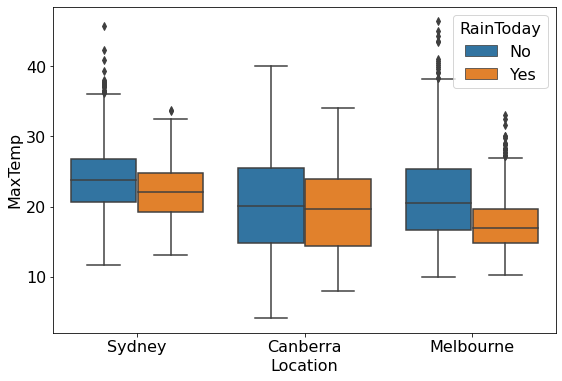

In [159]:
sns.boxplot(data = aussie_weather,x = 'Location', y = 'MaxTemp',hue = 'RainToday')

From the above plot, we observe that:
1. The maximum temperature of the day, on an average, is lower if it rained on the day.
2. Sydney and Melbourne have some extremely high outlying values of maximum temperature.

We have used the Seaborn [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function for the above plot.

### Scatterplots with Seaborn

We made scatterplots with Matplotlib and Pandas earlier. With Seaborn, the `regplot()` function allows us to plot a trendline over the scatterplot, along with a 95% confidence interval for the trendline. Note that this is much easier than making a trendline with Matplotlib.

Text(0, 0.5, 'Life expectancy')

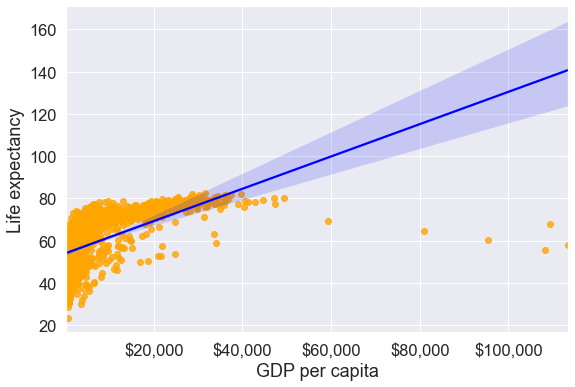

In [11]:
#Scatterplot and trendline with seaborn
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax=sns.regplot(x = 'gdpPercap', y = 'lifeExp', data = gdp_data,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Life expectancy')

Note that the confidence interval of the trendline broadens as we move farther away from most of the data points. In other words, there is more uncertainty about the trend as we move to a domain space farther away from the data.

### Heatmaps with Seaborn

**Purpose:** Heatmaps help us visualize the correlation between all variable-pairs. 

Below is a heatmap visualizing the pairwise correlation of all the numerical variables of `survey_data_clean`. With a heatmap it becomes easier to see strongly correlated variables.

<AxesSubplot:>

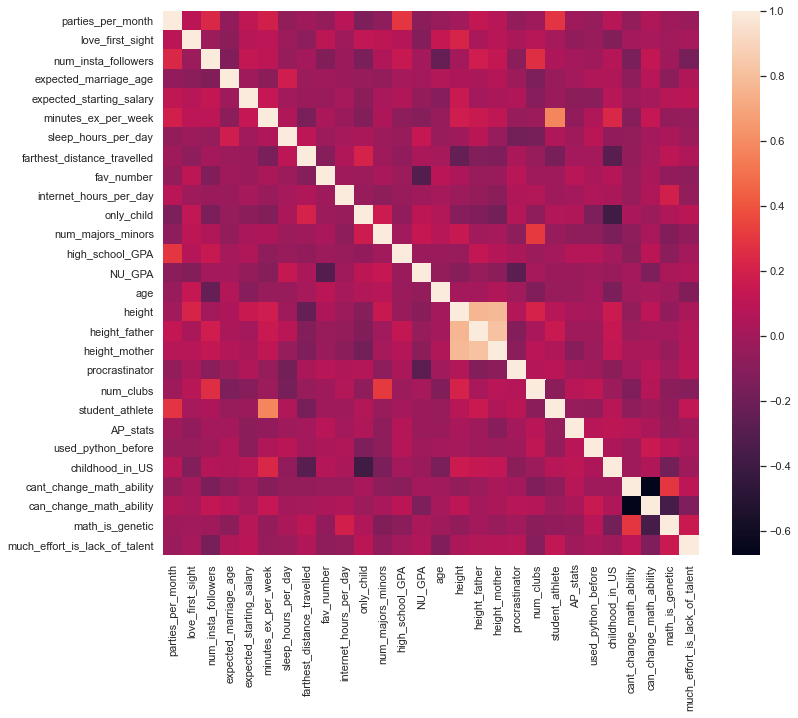

In [173]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(survey_data.corr())

From the above map, we can see that:

- `student athlete` is strongly postively correlated with `minutes_ex_per_week`
- `procrastinator` is strongly negatively correlated with `NU_GPA`

### Pairplots with Seaborn

**Purpose:** Pairplots are used to visualize the association between all variable-pairs in the data. In other words, pairplots simultaneously visualize the scatterplots between all variable-pairs.

Let us visualize the pair-wise association of nutrition variables in the starbucks drinks data.

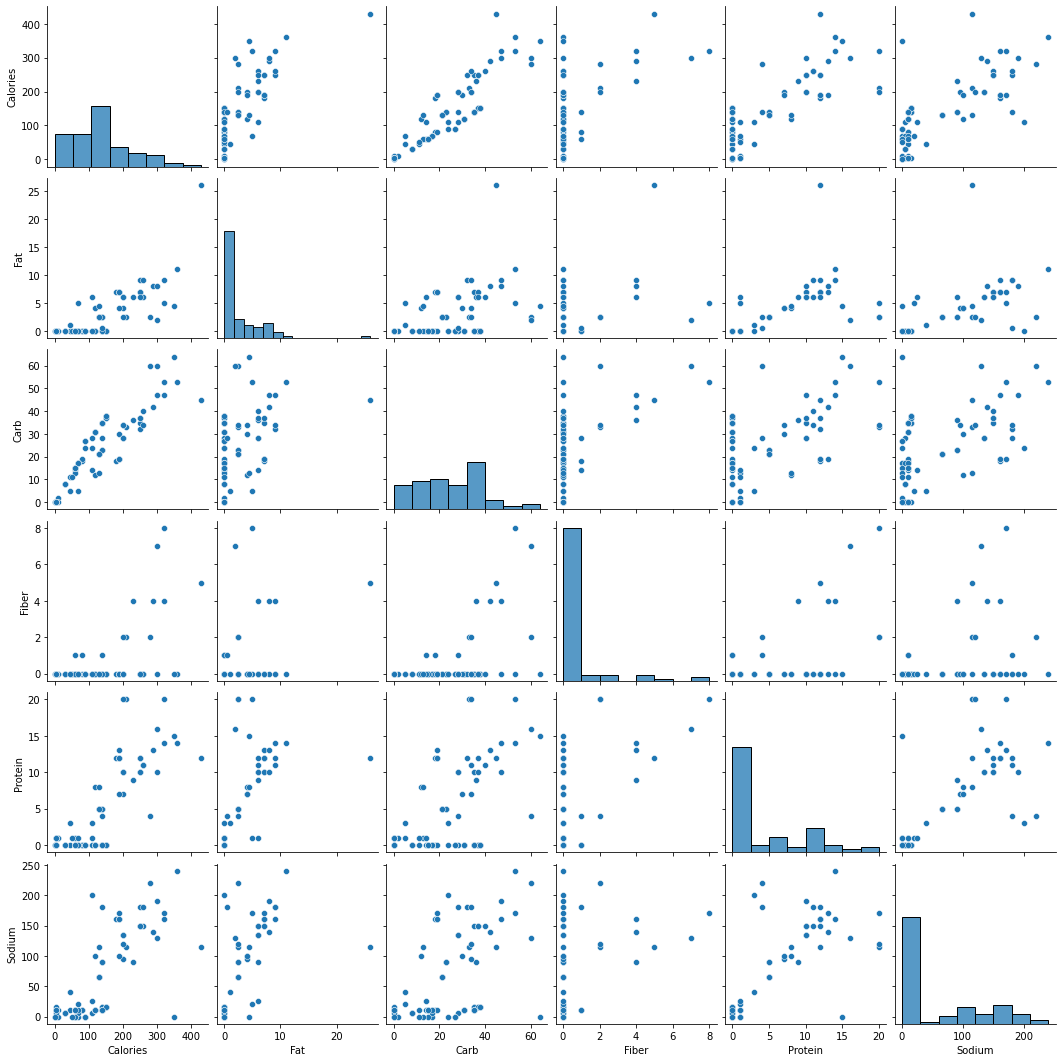

In [6]:
starbucks_drinks = pd.read_csv('./Datasets/starbucks-menu-nutrition-drinks.csv')
sns.pairplot(starbucks_drinks)

In the above pairplot, note that:

- The histograms on the diagonal of the grid show the distribution of each of the variables.
- Instead of a histogram, we can visualize the density plot with the argument *kde = True*.
- The scatterplots in the rest of the grid are the pair-wise plots of all the variables.

From the above plot, we observe that:

- Almost all the variable pairs have a positive correlation, i.e., if one of the nutrients increase in a drink, others also are likely to increase. 
- The number of calories seem to be strongly positively correlated with the amount of carbs in the drink.
- From the density plots we can see that there is a lot of choice for consumers to buy a drink that has a zero value for any of the nutrients - fat, protein, fiber, or sodium.